<a href="https://colab.research.google.com/github/monikaakkapalli/INSE_6220/blob/main/INSE_6220_Auto_MPG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Pycaret**

In [1]:
!pip install pycaret


In [4]:
from pycaret.utils import version
version()

'3.3.2'

In [5]:
!pip install pycaret[analysis]

# **Principal Component Analysis**
PCA stands for Principal Component Analysis, and it is a widely used technique in data analysis and machine learning for reducing the dimensionality of large datasets. The basic idea behind PCA is to transform a set of high-dimensional variables into a smaller set of uncorrelated variables called principal components, while retaining as much of the original variance as possible.

**Import Libraries**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [7]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Dataset**

The Auto MPG Dataset is a dataset from the UCI Machine Learning repository. It focuses on automobile fuel efficiency and offers specifications for the engine, weight, and performance of various car types. It focuses on fuel efficiency, which is an important issue in the car industry and sustainability research. The attributes are directly related to vehicle performance and design, making them useful for predictive modeling.

**Dataset Details**



1.   Miles per Gallon(mpg) - measures the fuel efficiency of the car.
2.   Cyliners(cy) - Number of engine cylinders.
3. Displacement(ds) - Engine size measured in cubic inches.
4. Horsepower(hp) - Power output of the engine.
5. Weight(wg) - Vehicle weight
6. Accelaration(acc) - Time required to achieve a specific speed.
7. Model Year(yr) -  Year of manufacture.
8. Origin(class) - Categorical variable representing the region of manufacture.
[America =0; Europe = 1; Japan = 2]

Original Dataset: https://www.kaggle.com/datasets/uciml/autompg-dataset



In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/monikaakkapalli/INSE_6220/refs/heads/main/Auto_mpg.csv')
df.head(25)

,mpg,cy,ds,hp,wg,acc,yr,class
0,18.0,8,307.0,130,3504,12.0,70,0
1,15.0,8,350.0,165,3693,11.5,70,0
2,18.0,8,318.0,150,3436,11.0,70,0
3,16.0,8,304.0,150,3433,12.0,70,0
4,17.0,8,302.0,140,3449,10.5,70,0
5,15.0,8,429.0,198,4341,10.0,70,0
6,14.0,8,454.0,220,4354,9.0,70,0
7,14.0,8,440.0,215,4312,8.5,70,0
8,14.0,8,455.0,225,4425,10.0,70,0
9,15.0,8,390.0,190,3850,8.5,70,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     199 non-null    float64
 1   cy      199 non-null    int64  
 2   ds      199 non-null    float64
 3   hp      199 non-null    int64  
 4   wg      199 non-null    int64  
 5   acc     199 non-null    float64
 6   yr      199 non-null    int64  
 7   class   199 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 12.6 KB


In [10]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [11]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Pair Plot**

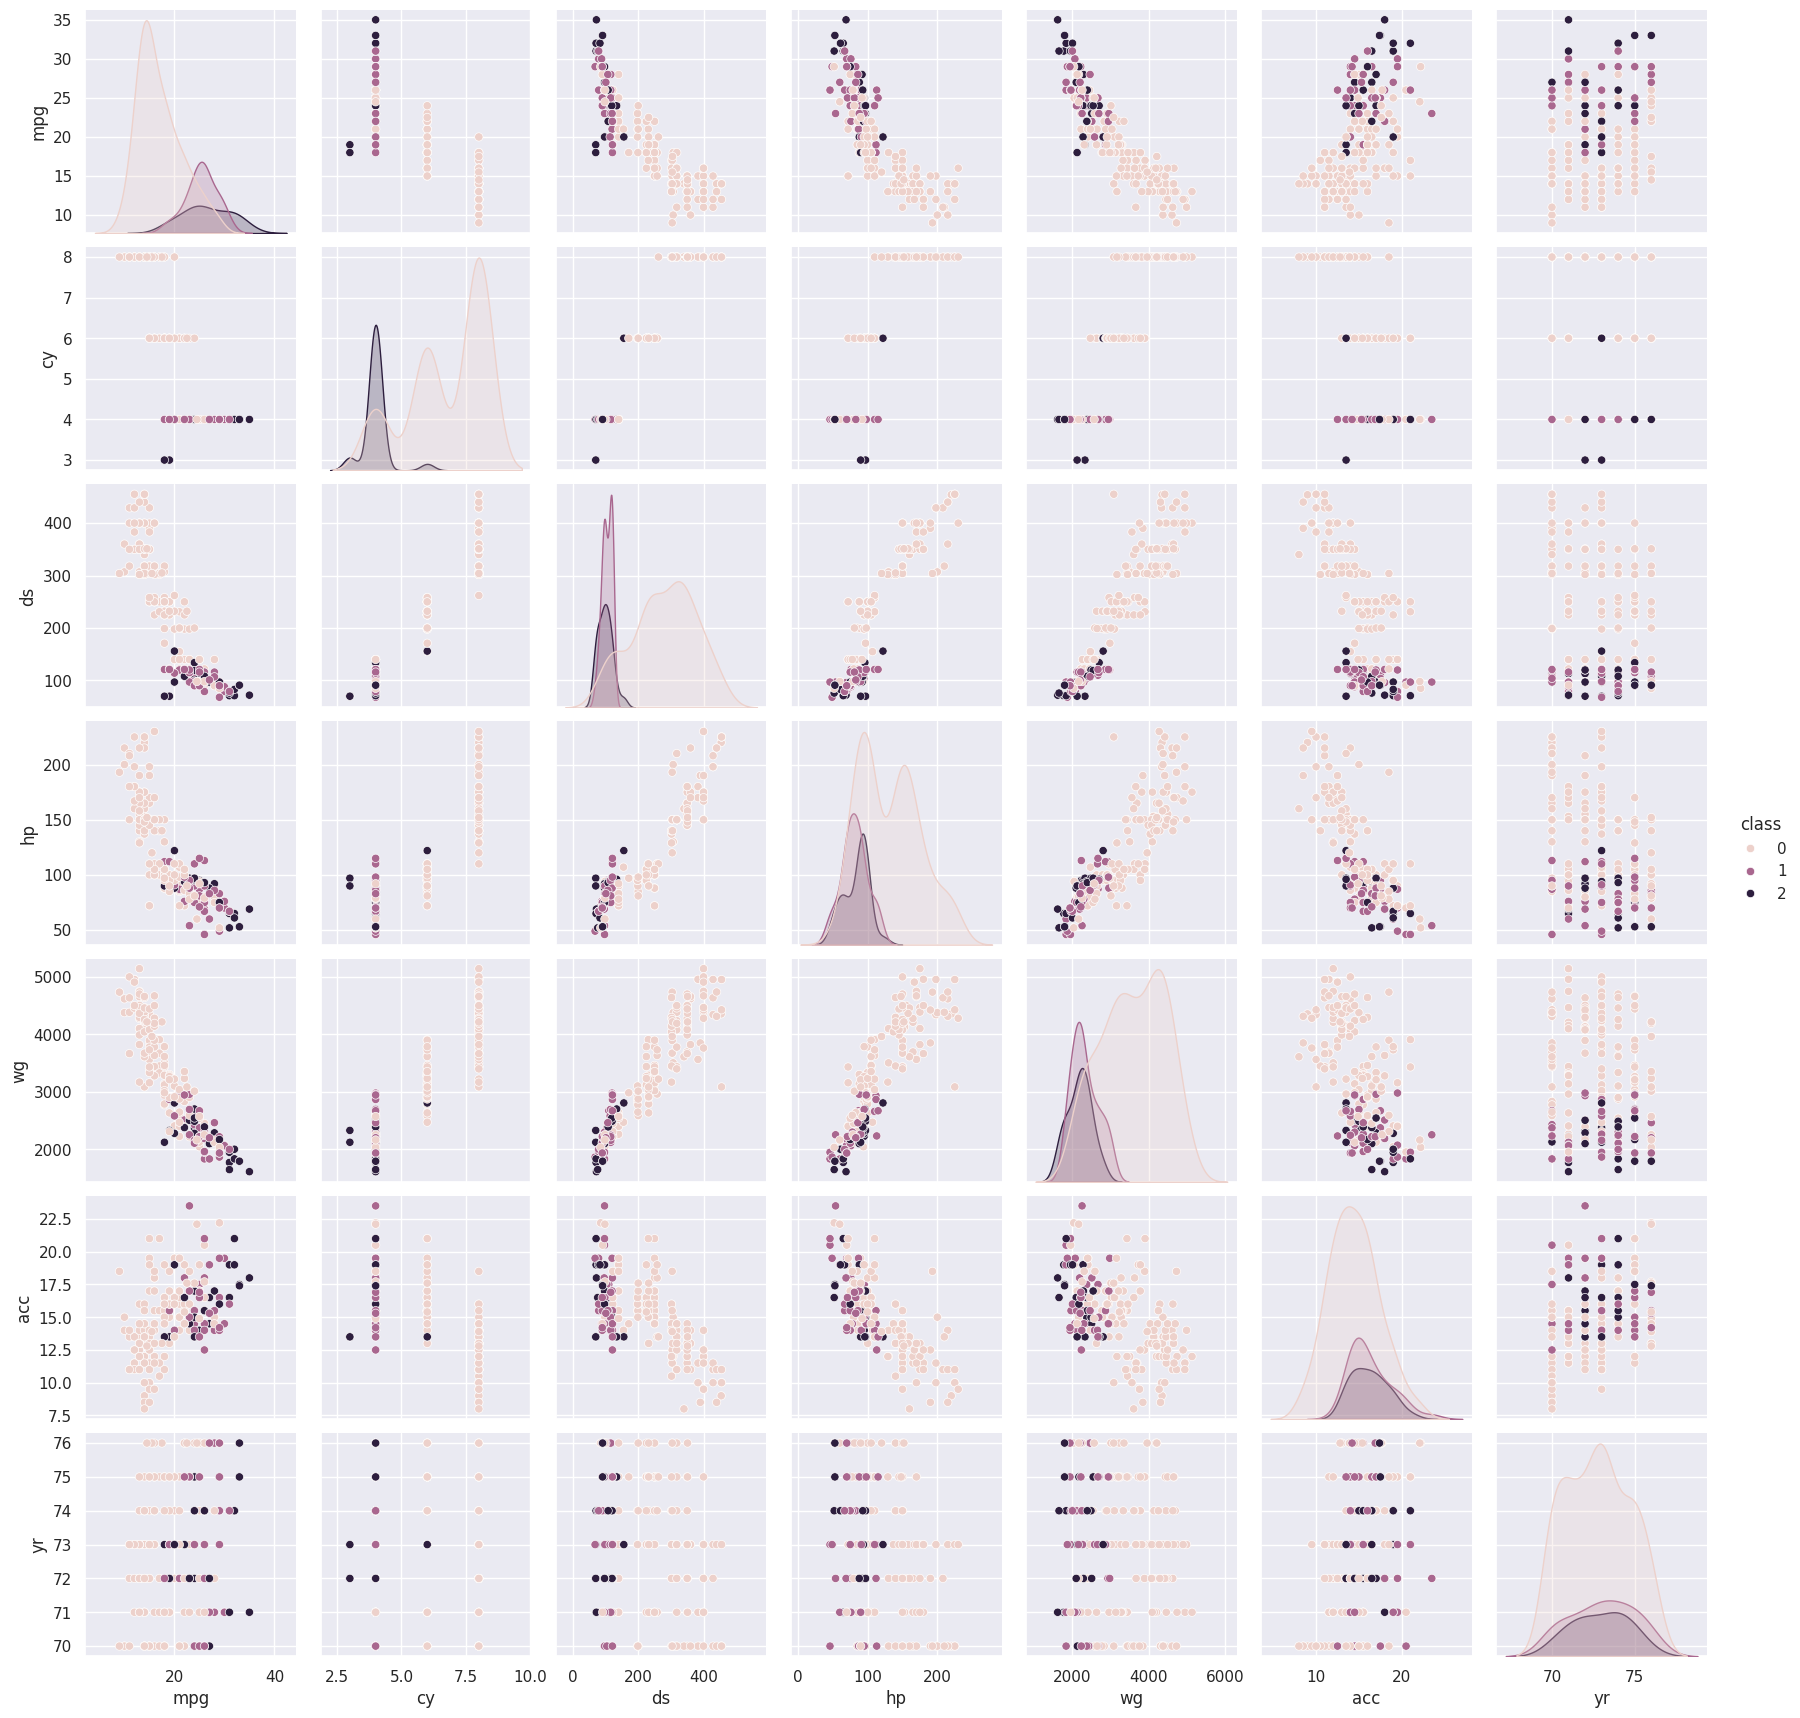

In [12]:
sns.pairplot(df, hue='class')
plt.show()

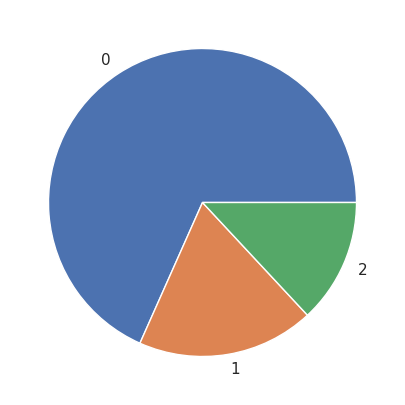

In [13]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [14]:
X = df.drop(columns=['class'])
X.head(10)

,mpg,cy,ds,hp,wg,acc,yr
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70
5,15.0,8,429.0,198,4341,10.0,70
6,14.0,8,454.0,220,4354,9.0,70
7,14.0,8,440.0,215,4312,8.5,70
8,14.0,8,455.0,225,4425,10.0,70
9,15.0,8,390.0,190,3850,8.5,70


In [15]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,199.0,19.786432,5.875464,9.0,15.0,19.0,24.75,35.0
cy,199.0,5.889447,1.785983,3.0,4.0,6.0,8.00,8.0
ds,199.0,222.801508,115.275656,68.0,113.0,225.0,318.00,455.0
hp,199.0,115.723618,43.561161,46.0,86.0,100.0,150.00,230.0
wg,199.0,3170.939698,937.559251,1613.0,2294.0,3021.0,4079.50,5140.0
acc,199.0,15.017588,2.870143,8.0,13.0,15.0,16.95,23.5
yr,199.0,72.834171,1.874237,70.0,71.0,73.0,74.00,76.0


**Standardize the data**

In [16]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,mpg,cy,ds,hp,wg,acc,yr
0,-0.304816,1.184712,0.732252,0.328558,0.356138,-1.054024,-1.515987
1,-0.816702,1.184712,1.106212,1.134053,0.558233,-1.228670,-1.515987
2,-0.304816,1.184712,0.827916,0.788841,0.283426,-1.403317,-1.515987
3,-0.646074,1.184712,0.706162,0.788841,0.280218,-1.054024,-1.515987
4,-0.475445,1.184712,0.688768,0.558700,0.297327,-1.577964,-1.515987
5,-0.816702,1.184712,1.793254,1.893519,1.251133,-1.752611,-1.515987
6,-0.987331,1.184712,2.010673,2.399830,1.265034,-2.101904,-1.515987
7,-0.987331,1.184712,1.888918,2.284759,1.220124,-2.276551,-1.515987
8,-0.987331,1.184712,2.019369,2.514900,1.340953,-1.752611,-1.515987
9,-0.816702,1.184712,1.454081,1.709406,0.726112,-2.276551,-1.515987


In [17]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,199.0,2.499397e-16,1.002522,-1.840474,-0.816702,-0.134188,0.846927,2.595869
cy,199.0,-5.355850e-17,1.002522,-1.621927,-1.060599,0.062056,1.184712,1.184712
ds,199.0,-8.926416e-17,1.002522,-1.346268,-0.954915,0.019120,0.827916,2.019369
hp,199.0,-3.570567e-17,1.002522,-1.604628,-0.684063,-0.361865,0.788841,2.629971
wg,199.0,-1.249698e-16,1.002522,-1.665888,-0.937702,-0.160329,0.971514,2.105495
acc,199.0,1.071170e-16,1.002522,-2.451198,-0.704730,-0.006143,0.674979,2.962851
yr,199.0,-3.641978e-15,1.002522,-1.515987,-0.981091,0.088701,0.623597,1.693389


In [18]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

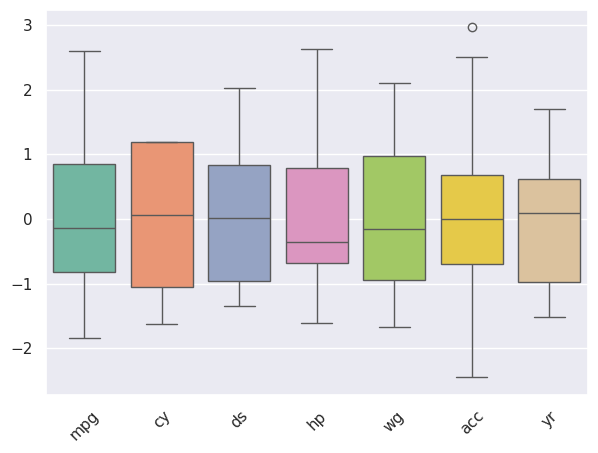

In [19]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

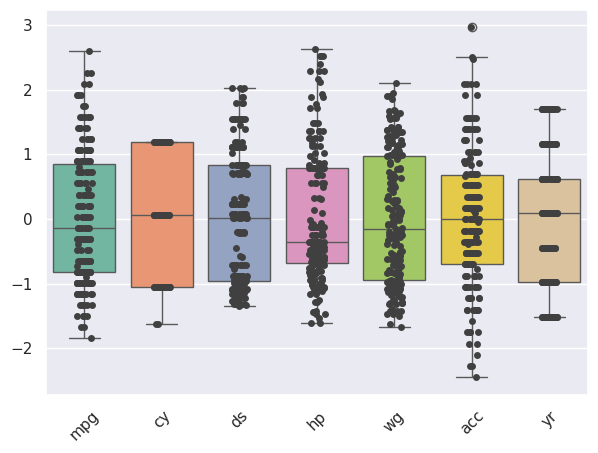

In [20]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

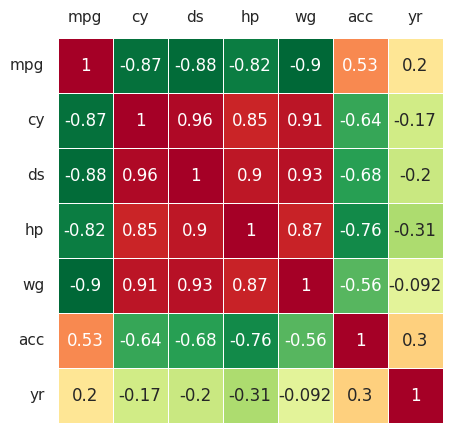

In [21]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

# **Applying PCA**


Text(0, 0.5, 'Z2')

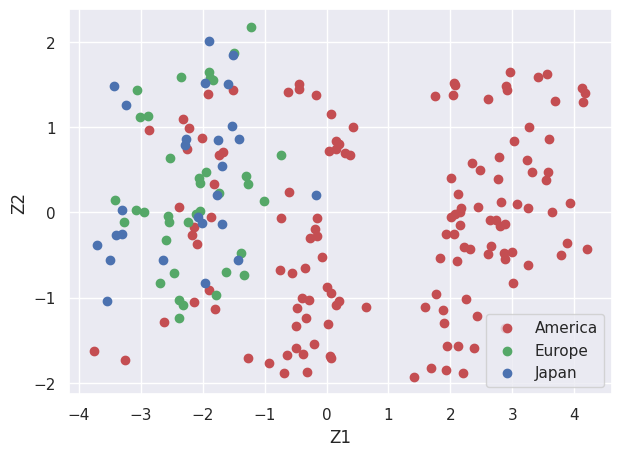

In [22]:
pca = PCA()
Z = pca.fit_transform(X)

idx_America = np.where(y == 0)
idx_Europe = np.where(y == 1)
idx_Japan = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_America,0], Z[idx_America,1], c='r', label='America')
plt.scatter(Z[idx_Europe,0], Z[idx_Europe,1], c='g', label='Europe')
plt.scatter(Z[idx_Japan,0], Z[idx_Japan,1], c='b', label='Japan')
plt.legend()
plt.xlabel('Z1')
plt.ylabel('Z2')

**Eigenvectors**

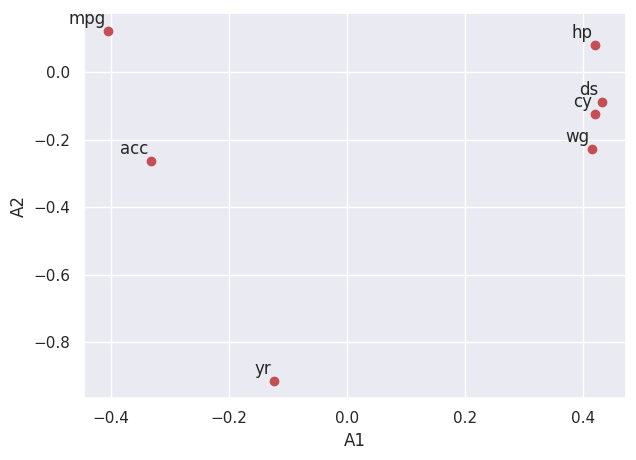

In [23]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

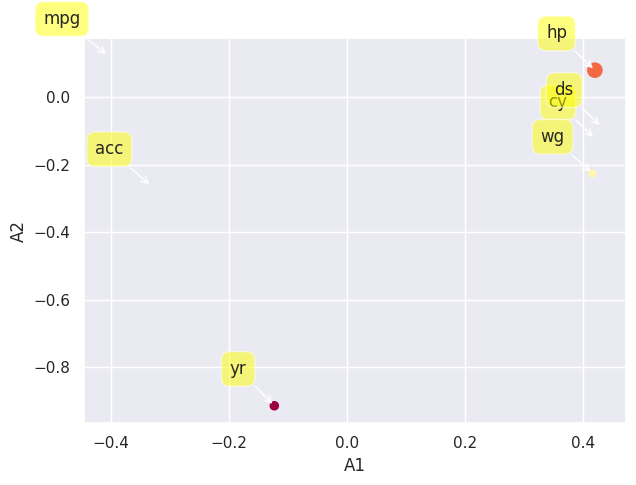

In [24]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('A1')
plt.ylabel('A2')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree Plot**

Text(0, 0.5, 'Explained variance')

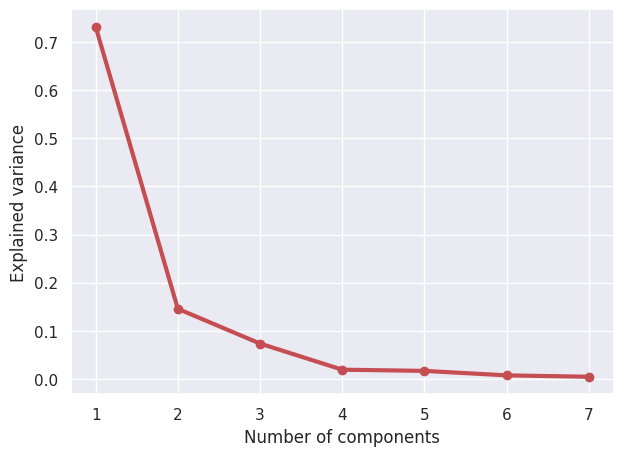

In [25]:
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

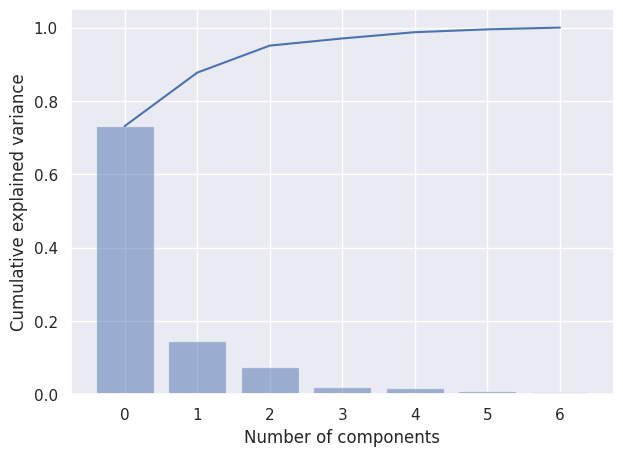

In [26]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

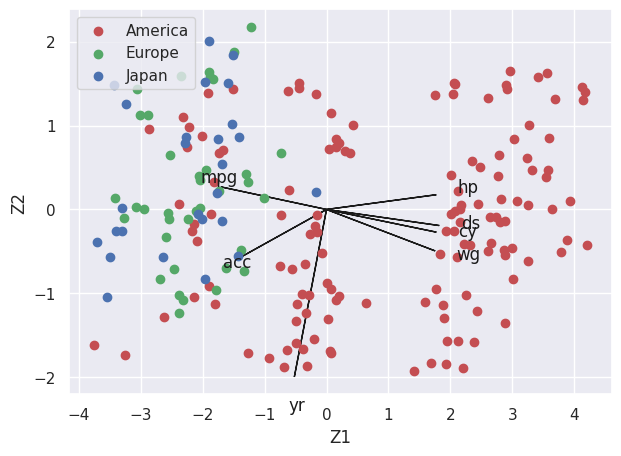

In [27]:
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('Z1')
plt.ylabel('Z2')
for i in range(len(A1)):
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_America,0], Z[idx_America,1], c='r', label='America')
plt.scatter(Z[idx_Europe,0], Z[idx_Europe,1], c='g', label='Europe')
plt.scatter(Z[idx_Japan,0], Z[idx_Japan,1], c='b', label='Japan')
plt.legend(loc='upper left')

# **Using PCA Library**

In [28]:
!pip install pca

  Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached matplotlib-3.10.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.5
    Uninstalling matplotlib-3.7.5:
      Successfully uninstalled matplotlib-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.14.3 requires pandas>=2.2.0, but you have pandas 2.1.4 which is incompatible.
pycaret 3.3.2 requires matplotlib<3.8.0, but you have matplotlib 3.10.0 which is incompatible.
ydata-profiling 4.12.1 requires matplotlib<3.10,>=3.5, but you have matplotlib 3.10.0 which is incompatible.


In [29]:
from pca import pca
model = pca()
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [30]:
out['PC']

,PC1,PC2,PC3
0,1.759147,1.360086,-0.033706
1,2.607307,1.329215,-0.050253
2,2.079226,1.496939,-0.393094
3,2.047505,1.374489,0.003991
4,2.055301,1.512389,-0.453354
...,...,...,...
194,-0.921081,-1.769140,0.044043
195,-3.758980,-1.620407,0.705804
196,-3.253674,-1.732095,0.947738
197,-2.683156,-0.832735,-1.675573


**Scatter Plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [97.03%] of the variance'}, xlabel='PC1 (73.1% expl.var)', ylabel='PC2 (14.5% expl.var)'>)

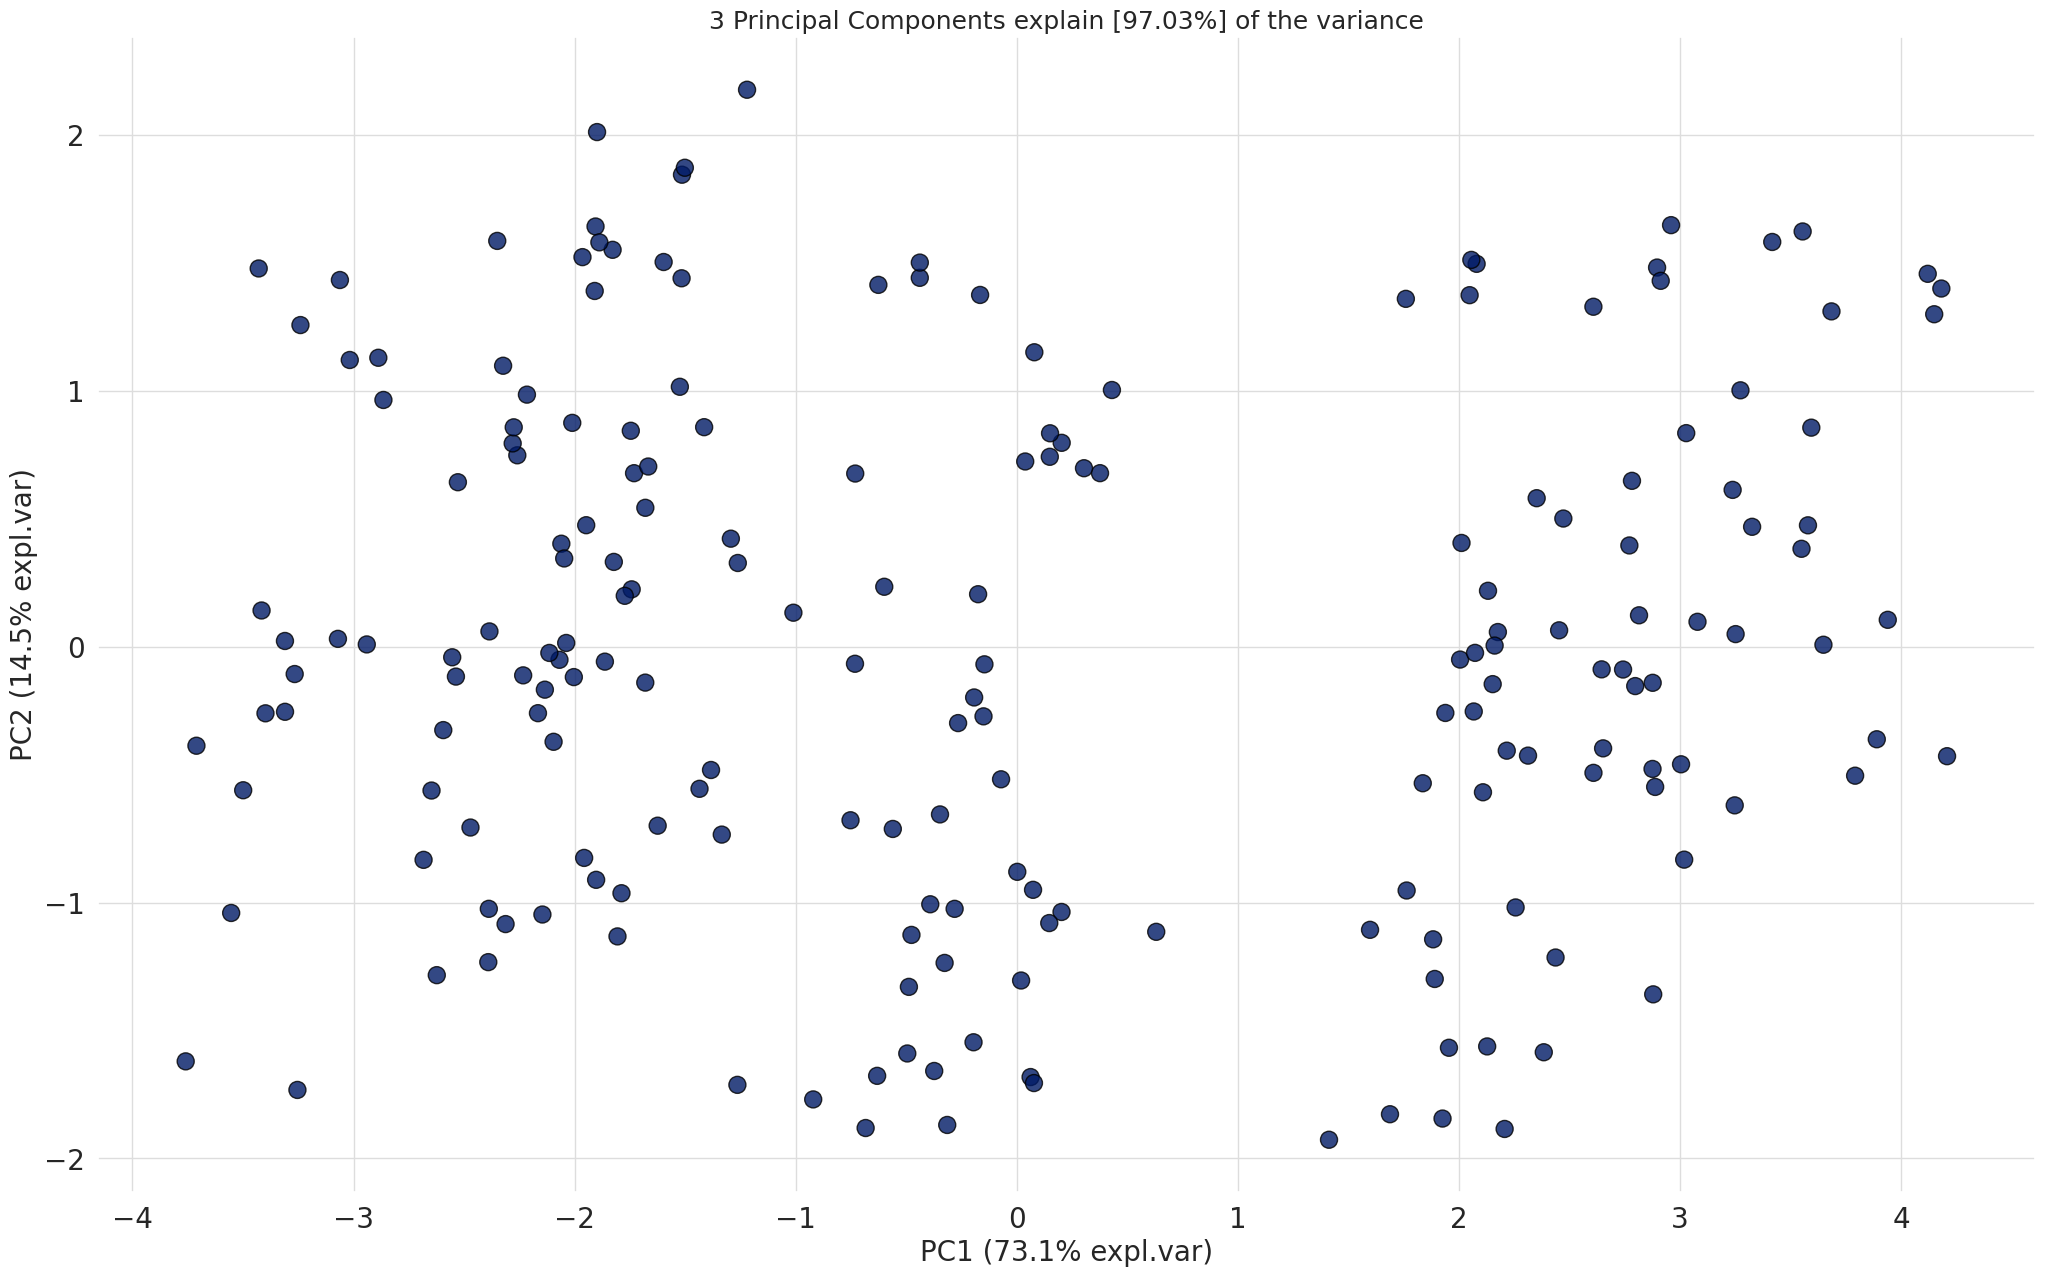

In [31]:
model.scatter(label=True, legend=False)

In [32]:
A = out['loadings'].T

**Eigenvectors**

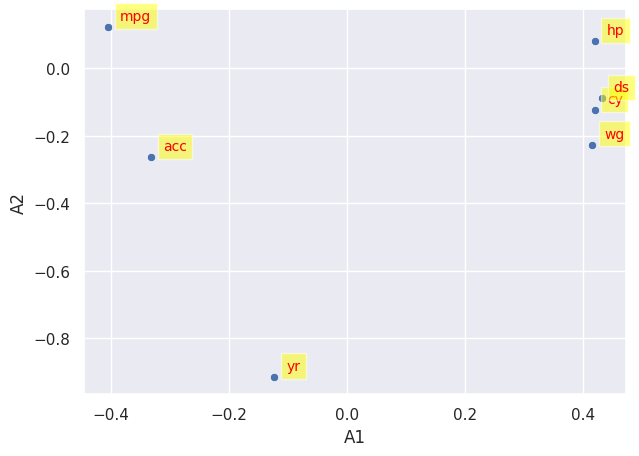

In [33]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('A1')
plt.ylabel('A2')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

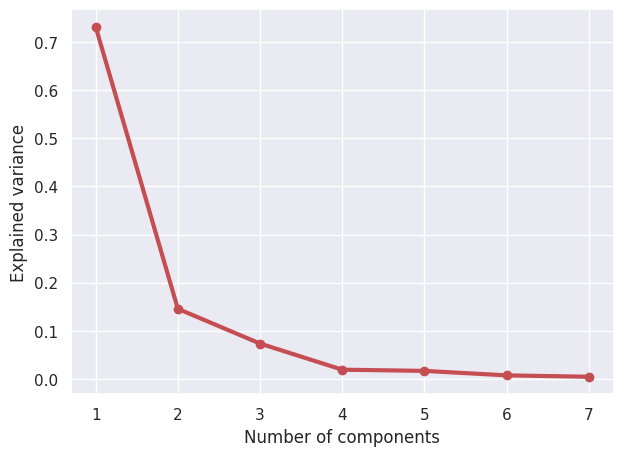

In [34]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

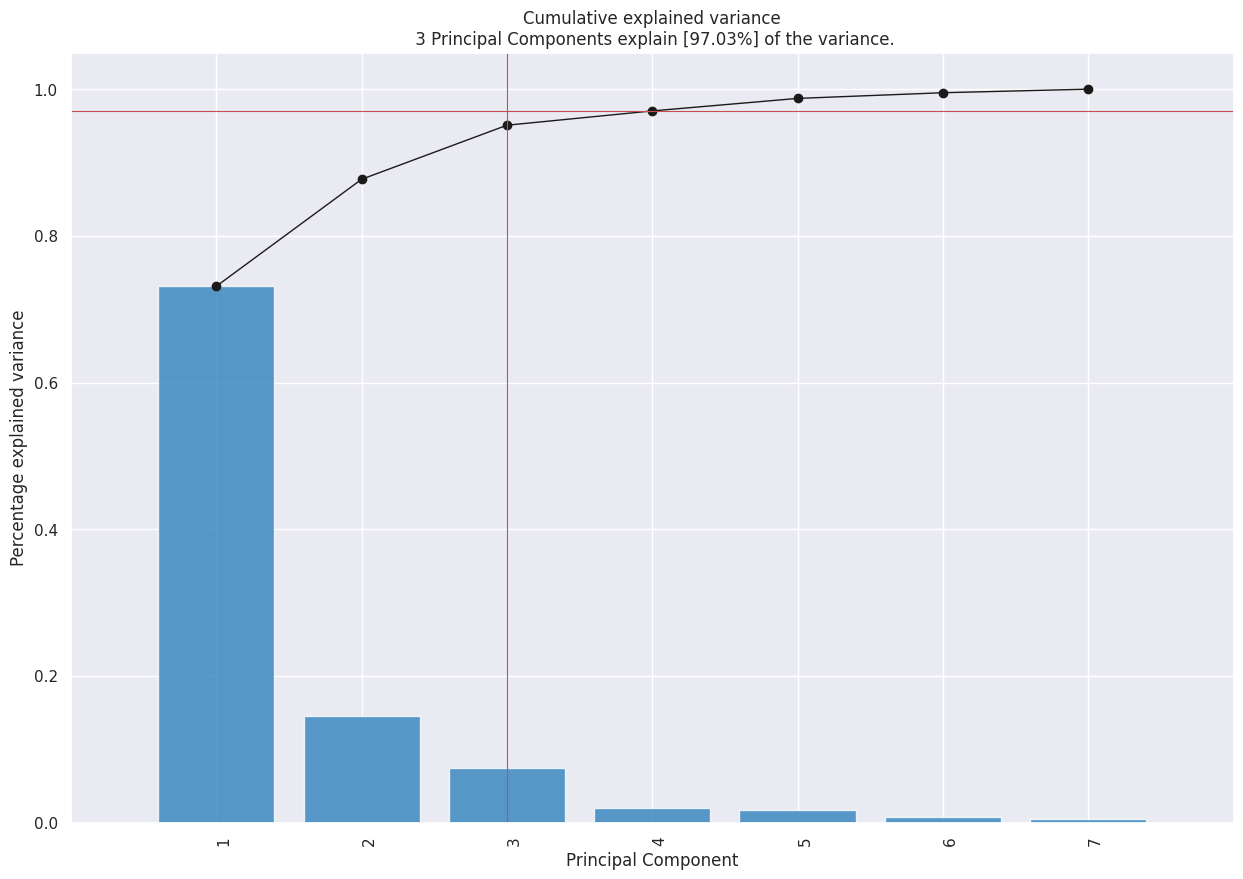

In [35]:
model.plot();

**Biplot**

[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[scatterd] >INFO> Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [97.03%] of the variance'}, xlabel='PC1 (73.1% expl.var)', ylabel='PC2 (14.5% expl.var)'>)

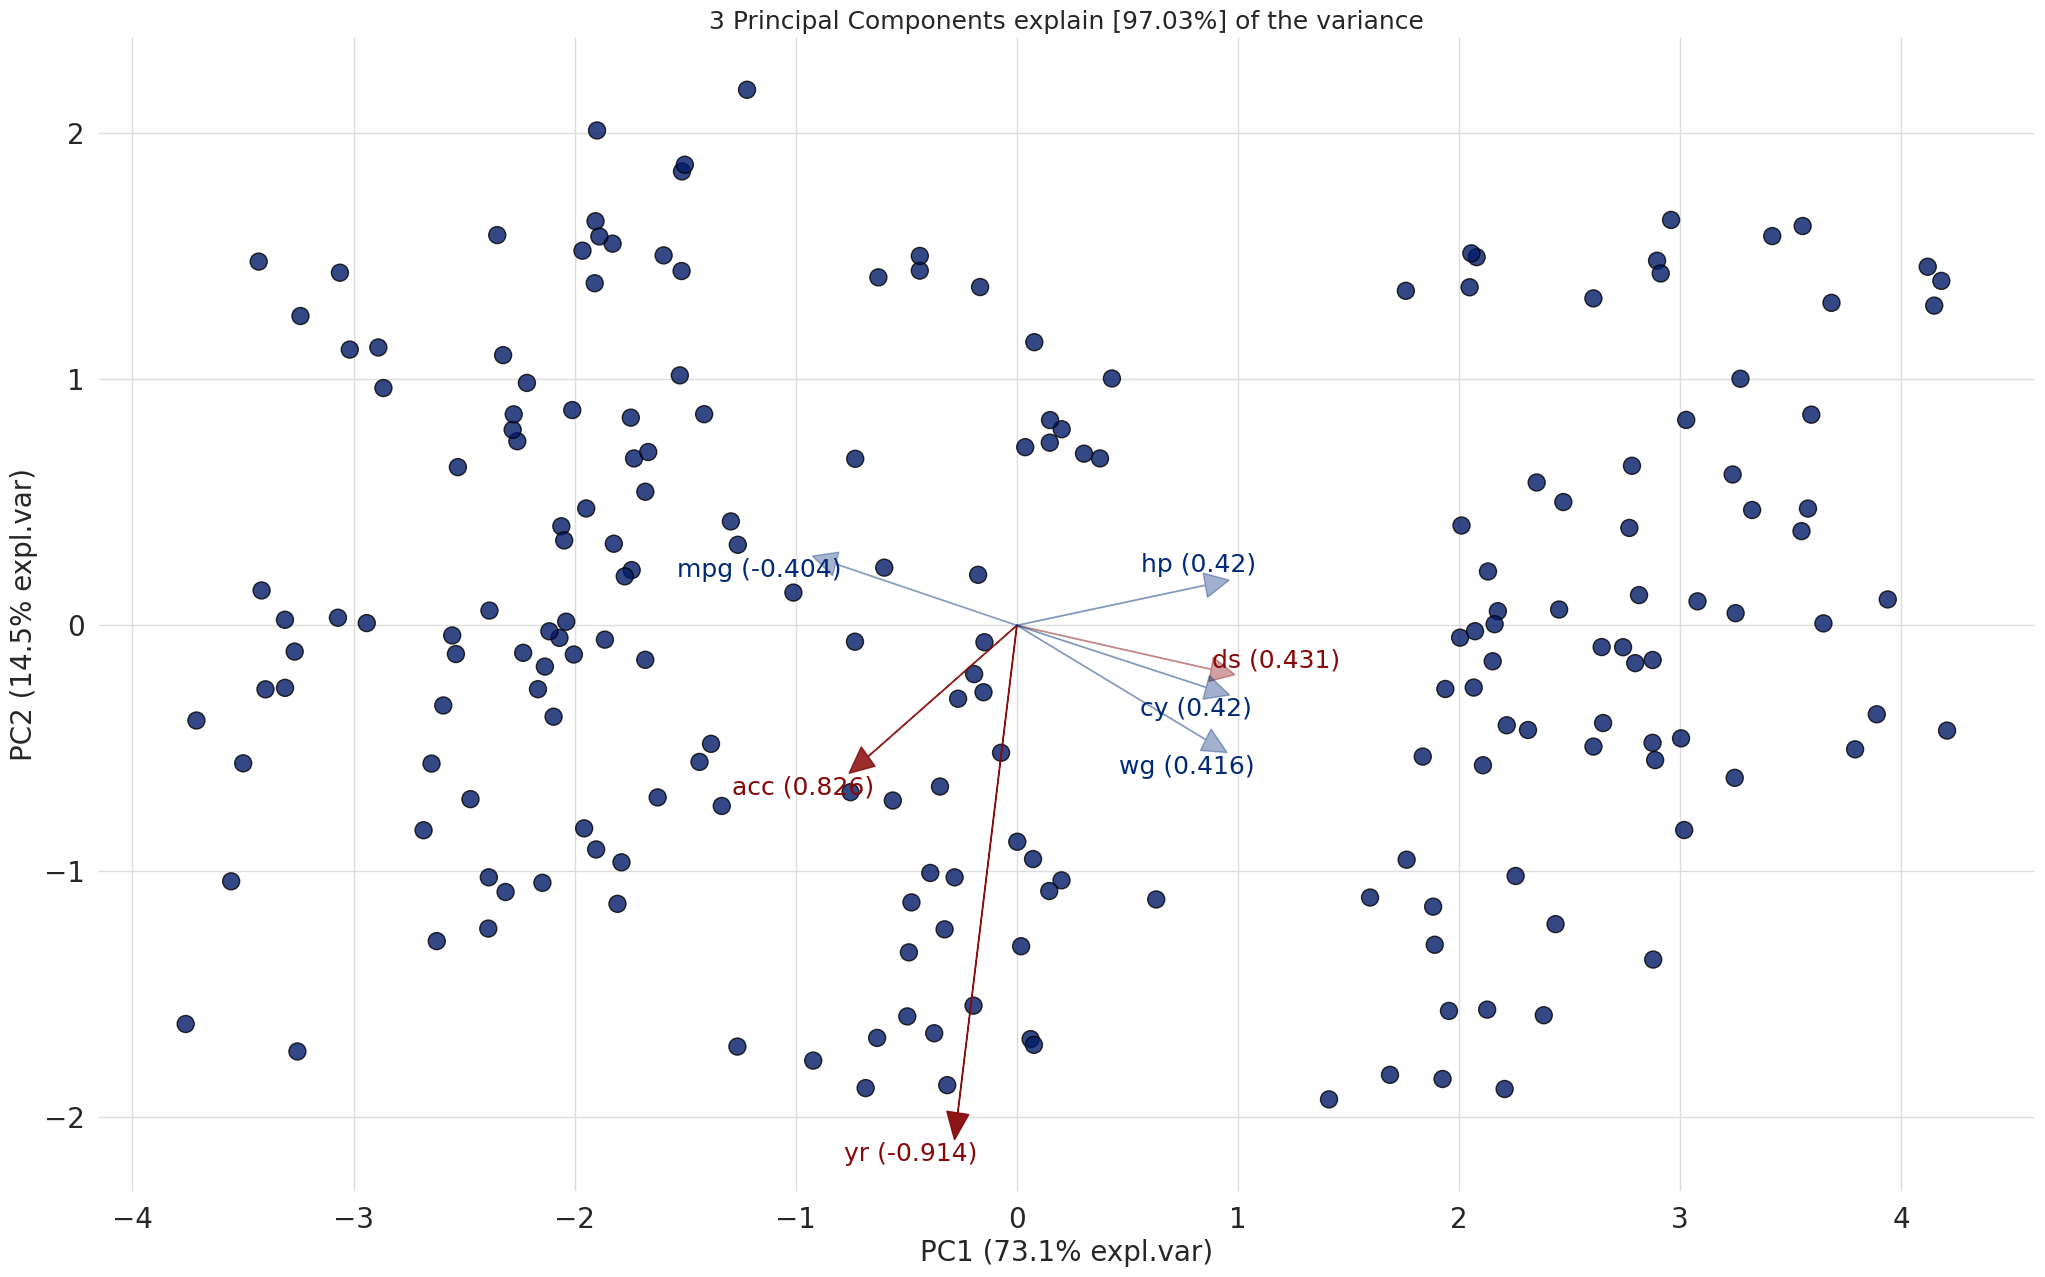

In [36]:
model.biplot(label=False, legend=False)

# **Multiclass Classification with PyCaret**

**Data Splitting**




In [37]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (179, 8)
Unseen Data For Predictions: (20, 8)


**Setting up the Environment in PyCaret**

In [38]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(179, 8)"
4,Transformed data shape,"(179, 8)"
5,Transformed train set shape,"(125, 8)"
6,Transformed test set shape,"(54, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


**Comparing all Machine Learning Models**

In [39]:
 best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8955,0.9756,0.8955,0.9217,0.8907,0.7932,0.8095,0.1990
gbc,Gradient Boosting Classifier,0.8872,0.0000,0.8872,0.9079,0.8820,0.7709,0.7863,0.5660
xgboost,Extreme Gradient Boosting,0.8808,0.9606,0.8808,0.9077,0.8817,0.7597,0.7721,0.0790
dt,Decision Tree Classifier,0.8628,0.8888,0.8628,0.8988,0.8633,0.7185,0.7369,0.0310
et,Extra Trees Classifier,0.8622,0.9671,0.8622,0.8947,0.8637,0.7318,0.7469,0.1540
lightgbm,Light Gradient Boosting Machine,0.8564,0.9592,0.8564,0.8721,0.8481,0.7104,0.7316,0.4530
lr,Logistic Regression,0.8308,0.0000,0.8308,0.8229,0.8172,0.6503,0.6688,0.9950
lda,Linear Discriminant Analysis,0.7987,0.0000,0.7987,0.7698,0.7671,0.6068,0.6422,0.0280
qda,Quadratic Discriminant Analysis,0.7904,0.0000,0.7904,0.7531,0.7556,0.5516,0.5843,0.0310
nb,Naive Bayes,0.7840,0.9315,0.7840,0.8092,0.7735,0.5958,0.6339,0.0300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [40]:
best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Decision Tree Classifier**

In [41]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9545,0.9231,0.9487,0.9179,0.8375,0.8482
1,0.9231,0.9583,0.9231,0.9615,0.9282,0.8375,0.8482
2,0.9231,0.9583,0.9231,0.9615,0.9282,0.8375,0.8482
3,0.8462,0.9167,0.8462,0.9487,0.8747,0.7045,0.7319
4,0.8462,0.7500,0.8462,0.7972,0.8077,0.5938,0.6486
5,0.7500,0.8500,0.7500,0.8333,0.7714,0.5714,0.5963
6,0.9167,0.9500,0.9167,0.9444,0.9111,0.8333,0.8452
7,0.7500,0.7750,0.7500,0.8056,0.7611,0.5000,0.5071
8,0.9167,0.9500,0.9167,0.9444,0.9111,0.8333,0.8452


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [42]:
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune Decision Tree Model**

In [43]:
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.8462,0.9481,0.8462,0.8462,0.8462,0.6667,0.6667
2,0.9231,0.9583,0.9231,0.9615,0.9282,0.8375,0.8482
3,0.7692,0.9263,0.7692,0.8077,0.7846,0.5125,0.5190
4,0.9231,0.8750,0.9231,0.8538,0.8866,0.8143,0.8332
5,0.7500,0.8500,0.7500,0.8333,0.7714,0.5714,0.5963
6,0.8333,0.9458,0.8333,0.8426,0.8219,0.6364,0.6499
7,0.9167,0.9583,0.9167,0.9444,0.9222,0.8462,0.8590
8,0.9167,0.9750,0.9167,0.9444,0.9111,0.8333,0.8452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [44]:
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [45]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**K Neighbors Model**

In [46]:
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6923,0.9379,0.6923,0.6667,0.6769,0.3500,0.3545
1,0.8462,0.9410,0.8462,0.7972,0.8077,0.5938,0.6486
2,0.6923,0.8147,0.6923,0.6189,0.6462,0.1875,0.2048
3,0.5385,0.7731,0.5385,0.4846,0.5101,-0.1143,-0.1169
4,0.7692,0.8885,0.7692,0.7500,0.7088,0.3276,0.4391
5,0.5833,0.8333,0.5833,0.6048,0.5810,0.2308,0.2535
6,0.9167,0.9458,0.9167,0.9444,0.9111,0.8333,0.8452
7,0.5000,0.7625,0.5000,0.5889,0.5238,0.1429,0.1562
8,0.7500,0.9375,0.7500,0.7000,0.7037,0.4000,0.4364


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [47]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7692,0.9397,0.7692,0.7538,0.7395,0.5517,0.6000
1,0.7692,0.9410,0.7692,0.7308,0.7473,0.4868,0.4937
2,0.6923,0.7705,0.6923,0.6981,0.6855,0.3659,0.3798
3,0.6923,0.8314,0.6923,0.6308,0.6599,0.2571,0.2631
4,0.7692,0.9000,0.7692,0.7500,0.7088,0.3276,0.4391
5,0.6667,0.8208,0.6667,0.7222,0.6548,0.4286,0.5000
6,0.7500,0.9521,0.7500,0.7333,0.7175,0.5385,0.5916
7,0.5833,0.7708,0.5833,0.7143,0.5869,0.3333,0.4226
8,0.8333,1.0000,0.8333,0.7500,0.7778,0.6667,0.7071


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

In [48]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Logistic Regression Model**

In [49]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.0000,0.9231,0.9308,0.9123,0.8219,0.8385
1,0.9231,0.0000,0.9231,0.8654,0.8901,0.8289,0.8407
2,0.7692,0.0000,0.7692,0.8077,0.7835,0.5357,0.5432
3,0.8462,0.0000,0.8462,0.8462,0.8462,0.6667,0.6667
4,0.8462,0.0000,0.8462,0.7972,0.8077,0.5938,0.6486
5,0.7500,0.0000,0.7500,0.8333,0.7659,0.5714,0.6030
6,0.9167,0.0000,0.9167,0.9259,0.9052,0.8182,0.8356
7,0.6667,0.0000,0.6667,0.6389,0.6500,0.3333,0.3381
8,0.8333,0.0000,0.8333,0.8333,0.8333,0.6667,0.6667


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [51]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [52]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.0000,0.9231,0.9487,0.9179,0.8375,0.8482
1,0.9231,0.0000,0.9231,0.8654,0.8901,0.8289,0.8407
2,0.7692,0.0000,0.7692,0.8077,0.7835,0.5357,0.5432
3,0.8462,0.0000,0.8462,0.8462,0.8462,0.6667,0.6667
4,0.9231,0.0000,0.9231,0.8538,0.8866,0.8143,0.8332
5,0.7500,0.0000,0.7500,0.8333,0.7659,0.5714,0.6030
6,0.9167,0.0000,0.9167,0.9259,0.9052,0.8182,0.8356
7,0.6667,0.0000,0.6667,0.6389,0.6500,0.3333,0.3381
8,0.9167,0.0000,0.9167,0.9444,0.9111,0.8333,0.8452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [53]:
tuned_lr

LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression Model**

In [54]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Random Forest Model**

In [55]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9231,0.9930,0.9231,0.9487,0.9179,0.8375,0.8482
1,0.9231,1.0000,0.9231,0.9615,0.9282,0.8375,0.8482
2,0.9231,0.9923,0.9231,0.8654,0.8901,0.8289,0.8407
3,0.8462,0.9923,0.8462,0.9487,0.8462,0.6829,0.7179
4,0.9231,0.9327,0.9231,0.8538,0.8866,0.8143,0.8332
5,0.7500,0.9833,0.7500,0.8333,0.7714,0.5714,0.5963
6,0.9167,0.9583,0.9167,0.9444,0.9111,0.8333,0.8452
7,0.8333,0.9125,0.8333,0.9167,0.8444,0.6923,0.7206
8,0.9167,0.9917,0.9167,0.9444,0.9111,0.8333,0.8452


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [56]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7692,0.9449,0.7692,0.8462,0.8054,0.5465,0.5548
2,0.9231,0.9583,0.9231,0.9615,0.9282,0.8375,0.8482
3,0.7692,0.9519,0.7692,0.8077,0.7846,0.5125,0.5190
4,0.9231,0.8750,0.9231,0.8538,0.8866,0.8143,0.8332
5,0.7500,0.8500,0.7500,0.8333,0.7714,0.5714,0.5963
6,0.9167,0.9542,0.9167,0.9444,0.9111,0.8333,0.8452
7,0.9167,0.9583,0.9167,0.9444,0.9222,0.8462,0.8590
8,0.9167,0.9917,0.9167,0.9444,0.9111,0.8333,0.8452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Random Forest Model**

In [57]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Tune the Best Model**

In [58]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.7692,0.9449,0.7692,0.8462,0.8054,0.5465,0.5548
2,0.9231,0.9583,0.9231,0.9615,0.9282,0.8375,0.8482
3,0.7692,0.9519,0.7692,0.8077,0.7846,0.5125,0.5190
4,0.9231,0.8750,0.9231,0.8538,0.8866,0.8143,0.8332
5,0.7500,0.8500,0.7500,0.8333,0.7714,0.5714,0.5963
6,0.9167,0.9542,0.9167,0.9444,0.9111,0.8333,0.8452
7,0.9167,0.9583,0.9167,0.9444,0.9222,0.8462,0.8590
8,0.9167,0.9917,0.9167,0.9444,0.9111,0.8333,0.8452


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [59]:
tuned_best_model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Evaluate the Best Model**

In [60]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Classification + PCA**

In [61]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Multiclass
3,Original data shape,"(199, 8)"
4,Transformed data shape,"(199, 4)"
5,Transformed train set shape,"(139, 4)"
6,Transformed test set shape,"(60, 4)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [62]:
best_model_pca = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7714,0.9072,0.7714,0.7376,0.7497,0.5010,0.5183,0.3590
et,Extra Trees Classifier,0.7637,0.9187,0.7637,0.7580,0.7504,0.4872,0.5061,0.1670
lda,Linear Discriminant Analysis,0.7560,0.0000,0.7560,0.7476,0.7411,0.4959,0.5153,0.0370
gbc,Gradient Boosting Classifier,0.7495,0.0000,0.7495,0.7279,0.7275,0.4430,0.4593,0.3110
ridge,Ridge Classifier,0.7418,0.0000,0.7418,0.6698,0.6985,0.4148,0.4406,0.0680
lightgbm,Light Gradient Boosting Machine,0.7418,0.9241,0.7418,0.7190,0.7214,0.4235,0.4464,0.6080
qda,Quadratic Discriminant Analysis,0.7412,0.0000,0.7412,0.7734,0.7470,0.4865,0.4969,0.0630
xgboost,Extreme Gradient Boosting,0.7346,0.8973,0.7346,0.7196,0.7170,0.4234,0.4416,0.0840
svm,SVM - Linear Kernel,0.7275,0.0000,0.7275,0.6674,0.6832,0.3773,0.4009,0.0690
lr,Logistic Regression,0.7269,0.0000,0.7269,0.7255,0.7152,0.4229,0.4421,0.0900


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [63]:
best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Tune the Best Model**

In [64]:
tuned_best_model_pca = tune_model(best_model_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.8744,0.7857,0.8786,0.7966,0.6147,0.6651
1,0.7857,0.9702,0.7857,0.7857,0.7857,0.5227,0.5227
2,0.7143,0.9048,0.7143,0.8095,0.7492,0.4615,0.4792
3,0.5714,0.8988,0.5714,0.6349,0.6015,0.1250,0.1292
4,0.7857,0.9167,0.7857,0.8333,0.8053,0.5625,0.5700
5,0.7857,0.9281,0.7857,0.6688,0.7214,0.5227,0.5606
6,0.6429,0.7923,0.6429,0.6548,0.6429,0.3204,0.3235
7,0.8571,0.9876,0.8571,0.8810,0.8622,0.7431,0.7512
8,0.7857,0.9050,0.7857,0.8214,0.7989,0.6111,0.6175


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [102]:
tuned_best_model_pca

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, n_estimators=100, n_jobs=-1,
                       oob_score=False, random_state=123, verbose=0,
                       warm_start=False)

**Evaluate the Best Model**

In [65]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Explainable AI with Shapley values**

In [66]:
rf_pca = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8571,0.9036,0.8571,0.8036,0.8265,0.6667,0.6751
1,0.7857,0.9286,0.7857,0.6667,0.7208,0.4167,0.4616
2,0.8571,0.9405,0.8571,0.8636,0.8469,0.6500,0.6625
3,0.6429,0.8988,0.6429,0.7063,0.6729,0.2708,0.2744
4,0.7857,0.9405,0.7857,0.7208,0.7517,0.4750,0.4842
5,0.7857,0.8681,0.7857,0.6964,0.7224,0.4878,0.5717
6,0.5714,0.7679,0.5714,0.5714,0.5714,0.1765,0.1765
7,0.7857,0.9495,0.7857,0.7857,0.7857,0.5882,0.5882
8,0.6429,0.8846,0.6429,0.5619,0.5985,0.2784,0.2883


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [67]:
tuned_rf_pca = tune_model(rf_pca)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7857,0.8744,0.7857,0.8786,0.7966,0.6147,0.6651
1,0.7857,0.9702,0.7857,0.7857,0.7857,0.5227,0.5227
2,0.7143,0.9048,0.7143,0.8095,0.7492,0.4615,0.4792
3,0.5714,0.8988,0.5714,0.6349,0.6015,0.1250,0.1292
4,0.7857,0.9167,0.7857,0.8333,0.8053,0.5625,0.5700
5,0.7857,0.9281,0.7857,0.6688,0.7214,0.5227,0.5606
6,0.6429,0.7923,0.6429,0.6548,0.6429,0.3204,0.3235
7,0.8571,0.9876,0.8571,0.8810,0.8622,0.7431,0.7512
8,0.7857,0.9050,0.7857,0.8214,0.7989,0.6111,0.6175


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot**

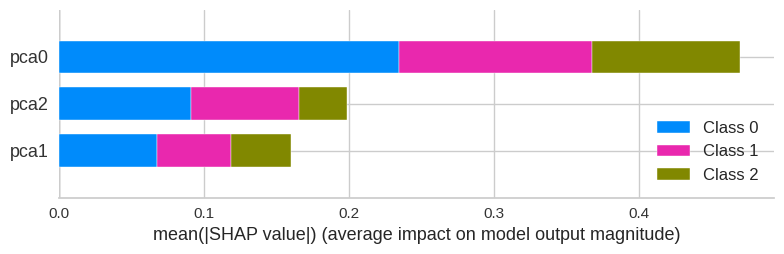

In [68]:
interpret_model(tuned_rf_pca, plot='summary')

**Visualize a single prediction**

In [69]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

**Visualize many predictions**

In [108]:
interpret_model(tuned_rf_pca, plot='reason')